<a href="https://colab.research.google.com/github/tripidhoble/Hackathon-Projects/blob/master/MFC_Capstone.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [0]:
path = "drive/My Drive/data/"

customer_df = pd.read_csv(path + 'customer.csv')
invoice_df = pd.read_csv(path + 'invoice.csv')
jtd_df = pd.read_csv(path + 'jtd.csv')
plant_df = pd.read_csv(path + 'plant.csv')
vehicles_df = pd.read_csv(path + 'vehicles.csv')

In [0]:
# Drop unwanted columns from all dataframes
def drop_col(df, col_to_drop):
  df.drop(col_to_drop, axis=1, inplace=True)
  return df

invoice_columns_to_drop = ['Unnamed: 0', 'Amt Rcvd From Custom', 'Amt Rcvd From Ins Co','Area / Locality',
                           'CGST(14%)', 'CGST(2.5%)', 'CGST(6%)', 'CGST(9%)',
                           'IGST(12%)', 'IGST(18%)', 'IGST(28%)', 'IGST(5%)', 'Insurance Company',
                           'Outstanding Amt', 'SGST/UGST(14%)', 'SGST/UGST(2.5%)', 'SGST/UGST(6%)', 'SGST/UGST(9%)',
                           'Service Advisor Name', 'TDS amount', 'Total CGST', 'Total GST', 'Total IGST',
                           'Total SGST/UGST'
                          ]
customer_columns_to_drop = ['Unnamed: 0','Death date']
plant_columns_to_drop = ['Unnamed: 0','Name 1','Factory calendar','Valuation Area', 'Customer no. - plant','PO Box','Name 2','Vendor number plant','House number and street']
jtd_columns_to_drop = ['Unnamed: 0']
vehicles_columns_to_drop = ['Unnamed: 0']

dataframes = [invoice_df, customer_df, plant_df, jtd_df, vehicles_df]
dataframe_columns_to_drop = [invoice_columns_to_drop, customer_columns_to_drop, plant_columns_to_drop, jtd_columns_to_drop, vehicles_columns_to_drop]

for i in range(len(dataframes)):
  drop_col(dataframes[i],dataframe_columns_to_drop[i])
  

In [0]:
#Remove leading zeros from 'Customer No.' column
def remove_leading_zeros(dataset,cols):
    for col in cols:
      dataset[col] = dataset[col].astype(str).apply(lambda x: x.lstrip("0"))
    return dataset

invoice_df  = remove_leading_zeros(invoice_df,['Customer No.'])
customer_df = remove_leading_zeros(customer_df,['Customer No.'])

In [0]:
# Merge dataframes based on key
def merge_df(left_df, right_df, key):
    merge_df = pd.merge(left=left_df, right=right_df, how='left', on=key)
    return merge_df

invoice_customer_df = merge_df(left_df=invoice_df, right_df=customer_df,key=['Customer No.'])
invoice_customer_plant_df = merge_df(left_df=invoice_customer_df, right_df=plant_df,key=['Plant'])

master_df = invoice_customer_plant_df

In [0]:
master_df['CITY'].fillna(master_df['City'])

#remove dulicate column 'City'
master_df = drop_col(df=master_df, col_to_drop=['City'])

In [0]:

# Function to identify the number of missing values in every feature
def missing_datas(dataset):
    total = dataset.isnull().sum().sort_values(ascending=False)
    percent = ((dataset.isnull().sum())*100/dataset.isnull().count()).sort_values(ascending=False)
    missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    return missing_data
    
    
missing_data = missing_datas(master_df)
print(missing_data[missing_data['Percent']>0.00])

In [0]:
# Function to drop missing values
def drop_missing(dataset, missing, min_threshold, max_threshold):
    dataset = dataset.drop((missing[missing['Percent'] > max_threshold]).index,axis= 1)
    dataset = dataset.dropna(axis=0, subset=(missing[missing['Percent'] < min_threshold]).index)
    return dataset 

master_df=drop_missing(dataset=master_df,missing=missing_data,min_threshold=25,max_threshold=40)

In [0]:
new_missing_data = missing_datas(master_df)
print(new_missing_data[new_missing_data['Percent']>0.00])

In [0]:
# Function to identify numeric features
def numeric_features(dataset):
    numeric_col = dataset.select_dtypes(include=['number']).columns
    return numeric_col


numeric_columns = numeric_features(master_df)
print("Numeric Features:")
print(numeric_columns)
print("===="*20)

# Function to identify categorical features
def categorical_features(dataset):
    categorical_col = dataset.select_dtypes(exclude=['number']).columns
    return categorical_col

categorical_columns = categorical_features(master_df)
print("Categorical Features:")
print(categorical_columns)

In [0]:
def lowercase(dataset, cols):
    for col in cols:
        dataset[col] = dataset[col].astype(str).apply(lambda x: x.lower())
    return dataset

master_df = lowercase(master_df,categorical_columns)

In [0]:
master_df.sample(5)

In [0]:
master_df.describe(include='all')

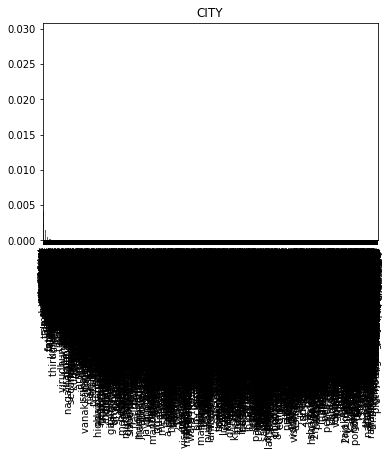

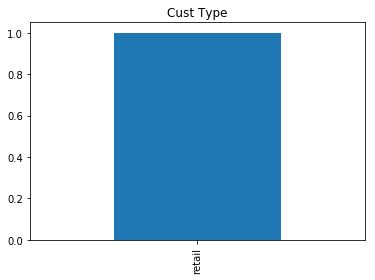

In [0]:
# Function to perform univariate analysis of categorical columns
def plot_categorical_columns(dataframe):
    categorical_columns = categorical_features(dataframe)
    dataframe = dataframe[categorical_columns]
    for i in dataframe:
        plt.title(i)
        dataframe[i].value_counts(normalize=True).plot(kind='bar')
        plt.show()

plot = plot_categorical_columns(master_df)